# Analysis of Nepali Character Recognition system

### <font color="blue">Team: </font>  
### <font color="blue">1)Kashi Bhattarai</font>  
### <font color="blue">2)Birav Bhattarai</font>  
### <font color="blue">2)Jimmy Das</font>

In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
from PIL import Image
import numpy as np
import os
# import random
from sklearn import ensemble,preprocessing
import keras.utils.np_utils

# Read the images

In [50]:
path = "./Sample/Train_Full_Data/"


folders = os.listdir(path)
imageList=[]
imageMatrix = []
newIm = []
labels=[]
# Get list of folders in current path
for folder in folders:
    newPath = path + folder  #Create new path by adding folder name
    folderName = os.path.split(os.path.abspath(newPath))[1]
    characterName = folderName.split("_")[2]
    imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] #Check if PNG files only then add
    for image in imageList:   #Traverse the list of files and add each file name to the imageFile
        im = Image.open(newPath+"//"+image)
        labels.append(characterName)
        imageArray = np.asarray(im.getdata())
        flattenedImageArray = imageArray.flatten()
        imageMatrix.append(flattenedImageArray)
print("Size of the image matrix = ",np.size(imageMatrix))

Size of the image matrix =  62668800


In [51]:
X = labels


In [52]:
import pickle
labe = open("labels.pickle", "wb")
pickle.dump(X, labe)
labe.close()

In [53]:
Y = open('labels.pickle', 'rb')
Z = pickle.load(Y)

In [54]:
a = np.array(imageMatrix)
a
print(a.shape)

(61200, 1024)


In [55]:
#define variables
n_samples = len(a)
X = a.reshape((n_samples,-1))
T = np.array(labels)
print('Features size = ',X.shape)
print('Labels size = ',T.shape)
print(T)


Features size =  (61200, 1024)
Labels size =  (61200,)
['yna' 'yna' 'yna' ... 'jha' 'jha' 'jha']


In [56]:
le=preprocessing.LabelEncoder()
le.fit(T)
T=le.transform(T)

T=keras.utils.np_utils.to_categorical(T)

In [57]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'adna': 0, 'ba': 1, 'bha': 2, 'cha': 3, 'chha': 4, 'chhya': 5, 'da': 6, 'daa': 7, 'dha': 8, 'dhaa': 9, 'ga': 10, 'gha': 11, 'gya': 12, 'ha': 13, 'ja': 14, 'jha': 15, 'ka': 16, 'kha': 17, 'kna': 18, 'la': 19, 'ma': 20, 'motosaw': 21, 'na': 22, 'pa': 23, 'patalosaw': 24, 'petchiryakha': 25, 'pha': 26, 'ra': 27, 'taamatar': 28, 'tabala': 29, 'tha': 30, 'thaa': 31, 'tra': 32, 'waw': 33, 'yaw': 34, 'yna': 35}


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, T_train, T_test = train_test_split(X, T, test_size=0.3, random_state=34)

In [59]:
print('Train size = ',X_train.shape," ",T_train.shape)

Train size =  (42840, 1024)   (42840, 36)


In [60]:
import numpy as np
import keras
from keras import models, layers, losses, optimizers, metrics
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.models import Sequential


In [61]:
img_height_rows = 32
img_width_cols = 32

In [62]:
im_shape = (img_height_rows, img_width_cols, 1)
print(im_shape)
x_train = X_train.reshape(X_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = X_test.reshape(X_test.shape[0], *im_shape)

(32, 32, 1)


# algorithm start from here

In [63]:

cnn = Sequential()

kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=4, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [64]:
from keras.layers import Conv2D

In [65]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [66]:
ip_conv_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=4, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [67]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [68]:
# Now add the Dense layers
h_dense_0 = Dense(units=20, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=1024, activation=ip_activation, kernel_initializer='uniform',name='dense11')
cnn.add(h_dense_1)

In [69]:
n_classes = 36
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [70]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [71]:
print(cnn.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 4)         40        
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 4)         148       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 4)         148       
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 4)         148       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                  

In [74]:
history = cnn.fit(x_train, T_train,
                  batch_size=100, epochs=30,
                  validation_data=(x_test, T_test))

Epoch 1/30
429/429 [==============================] - 41s 96ms/step - loss: 0.1373 - accuracy: 0.9505 - val_loss: 0.4272 - val_accuracy: 0.8988
Epoch 2/30
429/429 [==============================] - 76s 178ms/step - loss: 0.1325 - accuracy: 0.9528 - val_loss: 0.4000 - val_accuracy: 0.9028
Epoch 3/30
429/429 [==============================] - 23s 53ms/step - loss: 0.1322 - accuracy: 0.9537 - val_loss: 0.3924 - val_accuracy: 0.8998
Epoch 4/30
429/429 [==============================] - 23s 54ms/step - loss: 0.1275 - accuracy: 0.9550 - val_loss: 0.4560 - val_accuracy: 0.8955
Epoch 5/30
429/429 [==============================] - 22s 52ms/step - loss: 0.1280 - accuracy: 0.9547 - val_loss: 0.3965 - val_accuracy: 0.9042
Epoch 6/30
429/429 [==============================] - 22s 50ms/step - loss: 0.1168 - accuracy: 0.9595 - val_loss: 0.4324 - val_accuracy: 0.9028
Epoch 7/30
429/429 [==============================] - 21s 50ms/step - loss: 0.1195 - accuracy: 0.9567 - val_loss: 0.4114 - val_accuracy

In [75]:
# model is beeing save
scores = cnn.evaluate(x_test, T_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.70%


In [76]:
# import pickle
# with open('final1_model.sav', 'wb') as f:
# with open('model.pkl', 'wb') as f:
#     pickle.dump(cnn, f)

In [77]:
import pickle
# model = pickle.load(open('final1_model.sav', 'rb'))
# cnn.save('my_model1')
cnn.save('my_model')

# with open('model.pkl', 'rb') as f:
#         model = pickle.load(f)
        
# self written code for reading the models

# pickle_in = open("model.pkl","rb")
# classifier=pickle.load(pickle_in)

INFO:tensorflow:Assets written to: my_model\assets


In [78]:

# pickle_in = open("model.pkl","rb")
# classifier=pickle.load(pickle_in)
new_model = tf.keras.models.load_model('my_model')


In [79]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 4)         40        
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 4)         148       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 4)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 4)         148       
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 4)         148       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 4)          0         
 2D)                                                  

In [80]:
x_train[500].shape, T_train[500]

((32, 32, 1),
 array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.], dtype=float32))

In [81]:
# new_model.predict(x_train[0:])
output1 = new_model.predict(x_train[500].reshape(1, 32, 32, 1))
output1

array([[0.0000000e+00, 1.5957469e-31, 3.2241785e-13, 1.3603431e-27,
        5.8546791e-25, 1.0000000e+00, 2.2249144e-27, 0.0000000e+00,
        5.3484956e-22, 0.0000000e+00, 9.7648925e-37, 3.4936094e-21,
        2.7828892e-10, 8.1789020e-24, 2.7939705e-34, 1.7703607e-28,
        2.5559392e-29, 2.5598288e-32, 3.1342459e-35, 1.6491910e-25,
        5.0980779e-24, 4.0488626e-18, 3.4578074e-23, 1.3252741e-24,
        1.6264543e-19, 0.0000000e+00, 7.2383956e-32, 3.3117355e-21,
        4.6146360e-28, 3.0214284e-27, 6.5183024e-24, 0.0000000e+00,
        9.0943124e-15, 2.7920551e-25, 9.2995541e-20, 7.6996732e-26]],
      dtype=float32)

In [82]:
# print(output1.shape)
# output2 = output1.reshape(36, 1)
greatest = float('-inf')
pos = 0
for i in range(len(output1[0])):
#     print(output1[0][i], end=", ")
    if greatest < output1[0][i]:
        greatest = output1[0][i]
        pos = i  
print(greatest, pos)
output1 = [0]*36
output1[pos] = 1
print(output1)

1.0 5
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [83]:
len(np.unique(labels)), np.unique(labels)

(36, array(['adna', 'ba', 'bha', 'cha', 'chha', 'chhya', 'da', 'daa', 'dha',
        'dhaa', 'ga', 'gha', 'gya', 'ha', 'ja', 'jha', 'ka', 'kha', 'kna',
        'la', 'ma', 'motosaw', 'na', 'pa', 'patalosaw', 'petchiryakha',
        'pha', 'ra', 'taamatar', 'tabala', 'tha', 'thaa', 'tra', 'waw',
        'yaw', 'yna'], dtype='<U12'))

In [84]:
# plt.imshow(x_train[500])

In [85]:
input1 = x_train[0].reshape(1, 32, 32, 1)
input1.shape

(1, 32, 32, 1)

In [86]:
[0]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [87]:
# # path = "/testFiles/word2_0.png"
# # path = "testFiles/1414.png"
# path = ('./testFiles/word1_0.png')



# folders = os.listdir(path)
# imageList=[]
# imageMatrix = []
# newIm = []
# # labels=[]
# # Get list of folders in current path
# for folder in folders:
#     newPath = path + folder  #Create new path by adding folder name
#     folderName = os.path.split(os.path.abspath(newPath))[1]
#     characterName = folderName.split("_")[2]
#     imageList=[f for f in os.listdir(newPath) if os.path.splitext(f)[-1] == '.png'] #Check if PNG files only then add
#     for image in imageList:   #Traverse the list of files and add each file name to the imageFile
#         im = Image.open(newPath+"//"+image)
#         labels.append(characterName)
#         imageArray = np.asarray(im.getdata())
#         flattenedImageArray = imageArray.flatten()
#         imageMatrix.append(flattenedImageArray)
#         break
#     break
        
# print("Size of the image matrix = ",np.size(imageMatrix))

In [88]:
# im = Image.open( "testFiles/random4.png")
# # print(im.shape)
# imageArray = np.asarray(im.getdata())
# flattenedImageArray = imageArray.flatten()
# imageMatrix.append(flattenedImageArray)
# word1 = np.array(imageMatrix)
# print(word1.shape)
# word1 = word1.reshape((1, -1))
# word1.shape

In [89]:
import os

(32, 32)
0.9999801 32
tra


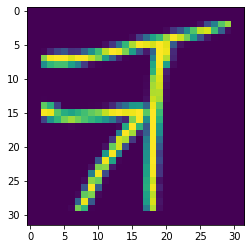

In [90]:
import cv2 as cv

img = cv.imread('testFiles/random2.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)


In [91]:
# X[0].reshape(1, 32, 32, 1)


# img = cv.imread('wordr1.PNG', cv.IMREAD_GRAYSCALE )
# # print(img.shape)
# # img1 =img.reshape((1, 32, 32, 1))
# # plt.imshow(img)
# # output = new_model.predict(img1)

# img2 = cv.resize(img, (32, 32,0))
# print(img2.shape)
# plt.imshow(img2)

# img3 =img2.reshape((1, 32, 32, 1))
# img3.shape
# # plt.imshow(img3)
# output = new_model.predict(img3)   
# print(output)
# def get_output(output1):
#     greatest = float('-inf')
#     pos = 0
#     for i in range(len(output1[0])):
#     #     print(output1[0][i], end=", ")
#         if greatest < output1[0][i]:
#             greatest = output1[0][i]
#             pos = i  
#     print(greatest, pos)
#     output1 = [0]*36
#     output1[pos] = 1
#     print(np.unique(labels)[pos])

# get_output(output)

In [92]:
np.unique(labels)

array(['adna', 'ba', 'bha', 'cha', 'chha', 'chhya', 'da', 'daa', 'dha',
       'dhaa', 'ga', 'gha', 'gya', 'ha', 'ja', 'jha', 'ka', 'kha', 'kna',
       'la', 'ma', 'motosaw', 'na', 'pa', 'patalosaw', 'petchiryakha',
       'pha', 'ra', 'taamatar', 'tabala', 'tha', 'thaa', 'tra', 'waw',
       'yaw', 'yna'], dtype='<U12')

In [93]:
x_train.shape

(42840, 32, 32, 1)

(32, 32)
0.9997271 18
kna


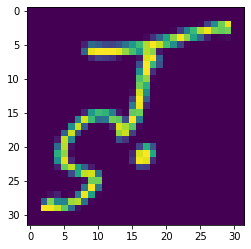

In [94]:
import cv2 as cv

img = cv.imread('testFiles/random3.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

(32, 32)
0.99999034 16
ka


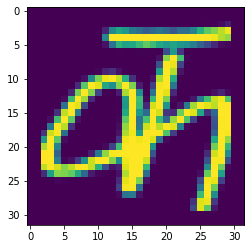

In [95]:
import cv2 as cv

img = cv.imread('testFiles/random4.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)


In [97]:
# import cv2 as cv

# img = cv.imread('testFiles/word1_0.png', cv.IMREAD_GRAYSCALE )
# print(img.shape)
# # img1 =img.reshape((1, 32, 32, 1))
# # plt.imshow(img)
# # output = new_model.predict(img1)

# # def get_output(output1):
# #     greatest = float('-inf')
# #     pos = 0
# #     for i in range(len(output1[0])):
# #     #     print(output1[0][i], end=", ")
# #         if greatest < output1[0][i]:
# #             greatest = output1[0][i]
# #             pos = i  
# #     print(greatest, pos)
# #     output1 = [0]*36
# #     output1[pos] = 1
# #     print(np.unique(labels)[pos])
    
# # get_output(output)


In [ ]:
# from PIL import Image
# im = Image.open("testFiles/word1_0.png")
# orig_size = im.size
# print(orig_size)
# display(im)

In [ ]:
# im.thumbnail([32, 32])
# display(im)

In [ ]:
# im.save("Dpi_test.png", dpi=(32, 32))

In [ ]:
# import cv2 as cv

# img = cv.imread('Dpi_test.png', cv.IMREAD_GRAYSCALE )
# print(img.shape)
# # img1 =img.reshape((1, 32, 32, 1))
# plt.imshow(img)
# output = new_model.predict(img1)

# def get_output(output1):
#     greatest = float('-inf')
#     pos = 0
#     for i in range(len(output1[0])):
#     #     print(output1[0][i], end=", ")
#         if greatest < output1[0][i]:
#             greatest = output1[0][i]
#             pos = i  
#     print(greatest, pos)
#     output1 = [0]*36
#     output1[pos] = 1
#     print(np.unique(labels)[pos])
    
# get_output(output)


(32, 32)
0.99156946 20
ma


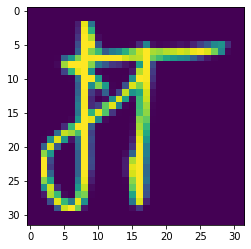

In [98]:
import cv2 as cv

img = cv.imread('testFiles/check.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)


In [ ]:
import cv2 as cv

img = cv.imread('testFiles/random5.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)


In [ ]:
import cv2 as cv

img = cv.imread('testFiles/random6.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)


In [ ]:
import cv2 as cv

img = cv.imread('testFiles/random1.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

In [ ]:
import cv2 as cv

img = cv.imread('testFiles/13102.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

In [ ]:
import cv2 as cv

img = cv.imread('testFiles/88606.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

In [ ]:
import cv2 as cv

img = cv.imread('testFiles/random7.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

(32, 32)
0.99951315 12
gya


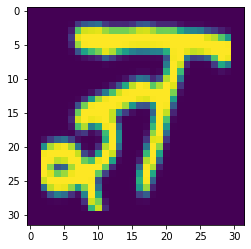

[[6.2793300e-21 7.3565827e-11 1.7343479e-12 7.4253178e-15 8.5093387e-15
  4.8419822e-04 2.7229869e-15 2.2671959e-15 5.1142386e-14 7.8771217e-22
  2.9339133e-15 1.5902285e-12 9.9951315e-01 4.2582680e-13 1.4441562e-10
  1.4770224e-21 4.0312922e-21 1.9059888e-13 2.9487046e-13 3.9025158e-11
  1.5789688e-10 3.2362231e-12 3.4545322e-10 3.6162943e-14 2.6416615e-06
  1.1615793e-17 2.1307041e-14 5.8791372e-10 4.1999384e-18 8.2730291e-14
  3.6692024e-14 9.3640717e-27 1.8040904e-08 1.8018144e-11 3.1721747e-13
  1.3196966e-12]]
0.99951315 12
gya


In [103]:
import cv2 as cv

img = cv.imread('testFiles/random9.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

In [ ]:
# import cv2 as cv

# img = cv.imread('testFiles/random10.png', cv.IMREAD_GRAYSCALE )
# print(img.shape)
# img1 =img.reshape((1, 32, 32, 1))
# print(img1)
# plt.imshow(img)
# output = new_model.predict(img1)

# def get_output(output1):
#     greatest = float('-inf')
#     pos = 0
#     for i in range(len(output1[0])):
#     #     print(output1[0][i], end=", ")
#         if greatest < output1[0][i]:
#             greatest = output1[0][i]
#             pos = i  
#     print(greatest, pos)
#     output1 = [0]*36
#     output1[pos] = 1
#     print(np.unique(labels)[pos])
    
# get_output(output)

(32, 32)
0.99998844 21
motosaw


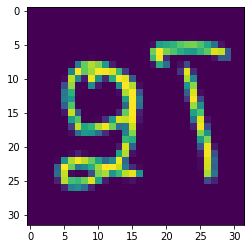

[[4.2427287e-13 2.3356078e-19 1.1541842e-05 3.2652236e-27 1.3305122e-23
  3.0062186e-19 1.4659883e-31 1.2380105e-28 5.2565065e-13 2.7064345e-30
  3.4095902e-09 1.9963690e-11 3.5668455e-17 4.6840356e-20 4.9137146e-21
  1.3403087e-15 3.4679475e-18 6.8726451e-19 8.6456259e-10 2.1684609e-29
  3.9850807e-21 9.9998844e-01 5.3138610e-22 5.4435898e-15 2.8066747e-13
  2.1363387e-09 3.7341009e-18 4.4495330e-27 1.1773988e-29 1.0090512e-22
  5.8100223e-11 1.1325266e-29 2.8912044e-09 4.6075038e-24 1.3159402e-11
  8.0567958e-10]]
0.99998844 21
motosaw


In [104]:
import cv2 as cv

img = cv.imread('testFiles/random10.png', cv.IMREAD_GRAYSCALE )
print(img.shape)
img1 =img.reshape((1, 32, 32, 1))
plt.imshow(img)
output = new_model.predict(img1)

def get_output(output1):
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    
get_output(output)

In [ ]:
# import cv2 as cv

# img = cv.imread('testFiles/just check.png', cv.IMREAD_GRAYSCALE )
# print(img.shape)
# # img1 =img.reshape((1, 32, 32, 1))
# # img1 = img.reshape(-1, 3, 32, 32)
# img = img.reshape(img.shape[0], 3, 32, 32)

# plt.imshow(img)
# output = new_model.predict(img1)

# def get_output(output1):
#     greatest = float('-inf')
#     pos = 0
#     for i in range(len(output1[0])):
#     #     print(output1[0][i], end=", ")
#         if greatest < output1[0][i]:
#             greatest = output1[0][i]
#             pos = i  
#     print(greatest, pos)
#     output1 = [0]*36
#     output1[pos] = 1
#     print(np.unique(labels)[pos])
    
# get_output(output)

In [ ]:

# from PIL import Image
# im = Image.open("testFiles/word1_1.png")
# orig_size = im.size
# print(orig_size)
# display(im)


In [ ]:
# # find the shape and size of image
# import cv2

# im = cv2.imread('testFiles/word1_1.png')

# print(type(im))
# # <class 'numpy.ndarray'>

# print(im.shape)
# print(type(im.shape))

In [ ]:
# im.thumbnail([32, 32])
# display(im)

In [ ]:
# im = im.transform(orig_size, Image.EXTENT, (0,0,32,32))
# display(im)

In [ ]:
# im.save("ma.png", dpi=(32, 32))


In [ ]:
# # find the shape and size of image
# import cv2

# im = cv2.imread('ma.png')

# print(type(im))
# # <class 'numpy.ndarray'>

# print(im.shape)
# print(type(im.shape))

In [ ]:
# import cv2 as cv

# img = cv.imread('ma.png', cv.IMREAD_GRAYSCALE )
# print(img.shape)
# # img1 =img.reshape((1, 32, 32, 1))
# plt.imshow(img)
# output = new_model.predict(img1)

# def get_output(output1):
#     greatest = float('-inf')
#     pos = 0
#     for i in range(len(output1[0])):
#     #     print(output1[0][i], end=", ")
#         if greatest < output1[0][i]:
#             greatest = output1[0][i]
#             pos = i  
#     print(greatest, pos)
#     output1 = [0]*36
#     output1[pos] = 1
#     print(np.unique(labels)[pos])
    
# get_output(output)


In [99]:
import anvil.server

In [100]:
anvil.server.connect("SRO2NKWY5QYWR6OPCLQF2F5O-2LOYQ4OHB452X3G2")

Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [101]:
import anvil.media 
from keras.preprocessing.image import load_img, img_to_array
import PIL as image
import numpy as np
import cv2 as cv

@anvil.server.callable
def classify_image(file):
    with anvil.media.TempFile(file) as filename:
        
        img =load_img(filename)

    plt.imshow(img)
    output1 = new_model.predict(img1)
    print(output1)
    greatest = float('-inf')
    pos = 0
    for i in range(len(output1[0])):
    #     print(output1[0][i], end=", ")
        if greatest < output1[0][i]:
            greatest = output1[0][i]
            pos = i  
    print(greatest, pos)
    output1 = [0]*36
    output1[pos] = 1
    print(np.unique(labels)[pos])
    return np.unique(labels)[pos]


    